In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier

MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

### began

In [3]:
df = pd.read_csv('E:/Experiments/Likun-Wang/datas/analysis/G-train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 836 entries, Image to exponential_ngtdm_Strength
dtypes: float64(824), int64(10), object(2)
memory usage: 581.4+ KB


In [4]:
df_drop = df.dropna(axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 836 entries, Image to exponential_ngtdm_Strength
dtypes: float64(824), int64(10), object(2)
memory usage: 581.4+ KB


In [5]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df_drop['y']))}
class_mapping

{0: 0, 1: 1}

In [6]:
df_drop.head()

,Image,Mask,y,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,exponential_gldm_LargeDependenceLowGrayLevelEmphasis,exponential_gldm_LowGrayLevelEmphasis,exponential_gldm_SmallDependenceEmphasis,exponential_gldm_SmallDependenceHighGrayLevelEmphasis,exponential_gldm_SmallDependenceLowGrayLevelEmphasis,exponential_ngtdm_Busyness,exponential_ngtdm_Coarseness,exponential_ngtdm_Complexity,exponential_ngtdm_Contrast,exponential_ngtdm_Strength
0,1.jpg.dcm,1.nrrd,1,0.274215,0,0,921.531876,852,253,865.222515,...,80.281753,0.998559,0.012602,0.012844,0.012549,20.909406,0.011987,0.003731,8.660000e-07,0.055363
1,10.jpg.dcm,10.nrrd,1,0.395039,0,0,539.895732,508,204,510.357718,...,80.208314,0.998970,0.012653,0.012898,0.012592,23.927267,0.020983,0.001064,1.450000e-06,0.021123
2,11.jpg.dcm,11.nrrd,1,0.263451,0,0,563.808063,538,145,538.301031,...,78.286944,0.987130,0.013953,1.252524,0.012909,22.022493,0.001243,40.317389,1.857090e-04,93.096184
3,12.jpg.dcm,12insection.nrrd,1,0.299283,0,0,583.596142,642,213,648.521395,...,73.745412,0.953249,0.016476,0.431689,0.013348,28.365294,0.000759,44.547102,1.823870e-04,5.525404
4,13.jpg.dcm,13insertion.nrrd,1,0.210148,0,0,302.839046,288,67,298.511306,...,76.168538,0.982774,0.018779,0.104727,0.014054,8.956547,0.005530,2.524035,4.910000e-05,1.904740


In [7]:
from sklearn.preprocessing import LabelEncoder
df_drop['y'] = df_drop['y'].map(class_mapping)
y = LabelEncoder().fit_transform(df_drop['y'].values)
X = df_drop.iloc[:, 3:836].values
print(y.shape)
print(X.shape)

(89,)
(89, 833)


In [8]:
feat_labels = df_drop.columns[3:836]

In [9]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
print(X_std.shape)

(89, 833)


In [10]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [12]:
df1 = df[['original_shape_Elongation',
          'original_shape_MajorAxisLength',
          'original_shape_Maximum2DDiameterColumn',
          'wavelet-HL_gldm_HighGrayLevelEmphasis',
          'square_glszm_SmallAreaHighGrayLevelEmphasis',
          'original_shape_Maximum3DDiameter',
          'wavelet-LH_firstorder_90Percentile',
          'wavelet-LL_glcm_MaximumProbability',
          'squareroot_ngtdm_Coarseness',
          'original_glrlm_RunPercentage']]
X1 = df1.values
print(X1.shape)
y1 = y
std = StandardScaler()
X1_std = std.fit_transform(X1)
print(X1_std.shape)
print(y1.shape)

(89, 10)
(89, 10)
(89,)


In [13]:
clf1 = LogisticRegression(penalty='l2',C=2, multi_class='auto',solver='liblinear',random_state=1)
clf2 = ensemble.RandomForestClassifier()
clf3 = svm.SVC(probability=True)
clf4 =ensemble.RandomForestClassifier(bootstrap=True,criterion='gini',oob_score=True,n_jobs=-1, max_depth=5,
                                max_features='sqrt',n_estimators=10,min_samples_leaf=5,
                                random_state=50)

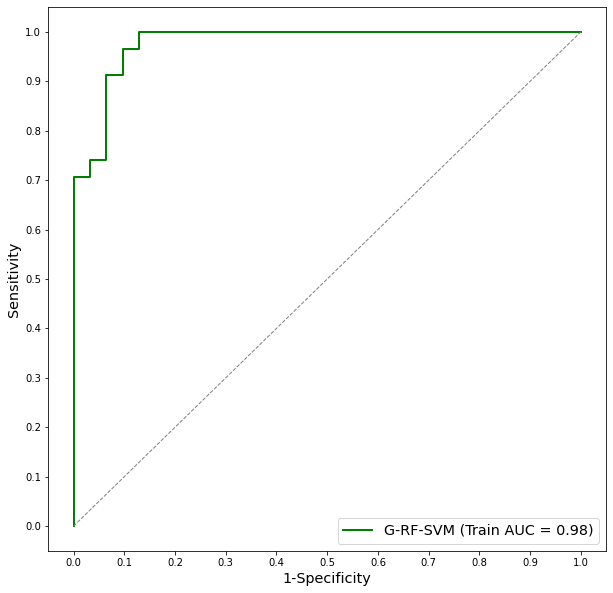

In [16]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

###################################################################

probas_ = clf3.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='G-RF-SVM (Train AUC = %0.2f)' % roc_auc) 

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('11.jpg',dpi=1200)
plt.show()

### Test set

In [17]:
df11 = pd.read_csv('E:/Experiments/Likun-Wang/datas/analysis/G-test.csv')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df11['y']))}
df11['y'] = df11['y'].map(class_mapping)
y11 = LabelEncoder().fit_transform(df11['y'].values)
df111 = df11[['original_shape_Elongation',
          'original_shape_MajorAxisLength',
          'original_shape_Maximum2DDiameterColumn',
          'wavelet-HL_gldm_HighGrayLevelEmphasis',
          'square_glszm_SmallAreaHighGrayLevelEmphasis',
          'original_shape_Maximum3DDiameter',
          'wavelet-LH_firstorder_90Percentile',
          'wavelet-LL_glcm_MaximumProbability',
          'squareroot_ngtdm_Coarseness',
          'original_glrlm_RunPercentage']]
X11 = df111.values

X11_std = std.fit_transform(X11)
print(X11_std.shape)
print(y11.shape)

(50, 10)
(50,)


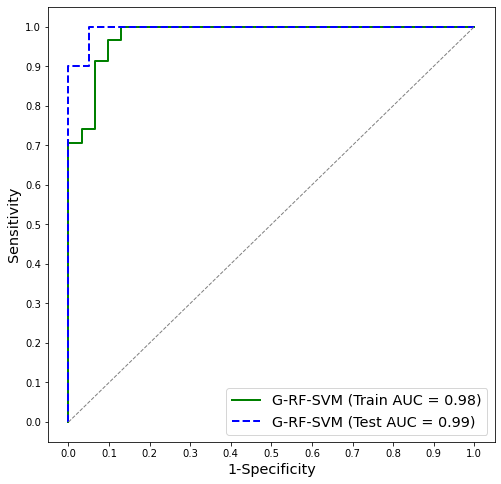

In [19]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

###################################################################

probas_ = clf3.predict_proba(X1_std)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='G-RF-SVM (Train AUC = %0.2f)' % roc_auc) 

###################################################################
probas_ = clf3.predict_proba(X11_std)
fpr, tpr, thresholds = roc_curve(y11, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='--',label='G-RF-SVM (Test AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.savefig('12.jpg',dpi=1200)
plt.show()

### Isotonic regression

In [20]:
a = clf3.predict_proba(X1_std)
b = clf3.predict_proba(X11_std)

In [21]:
a[:,1]

array([0.9247571 , 0.98875931, 0.92481496, 0.9077301 , 0.93192733,
       0.92481498, 0.95095371, 0.79296416, 0.94011145, 0.60329421,
       0.36335249, 0.91856454, 0.87390238, 0.61223372, 0.97368662,
       0.97656065, 0.81756887, 0.9347829 , 0.93098089, 0.92485079,
       0.92479551, 0.93508992, 0.95853377, 0.90121442, 0.70205373,
       0.86595949, 0.60399653, 0.92481993, 0.98938395, 0.85874148,
       0.33915913, 0.92529864, 0.92481486, 0.92732311, 0.96270335,
       0.93692825, 0.9891589 , 0.92411571, 0.98213929, 0.91606526,
       0.94898497, 0.94611691, 0.92905661, 0.92475768, 0.97096927,
       0.9247817 , 0.79959878, 0.96505083, 0.82367341, 0.81203909,
       0.92482765, 0.95383761, 0.93499676, 0.88614775, 0.97267743,
       0.95690189, 0.92476973, 0.79369878, 0.06284137, 0.07121481,
       0.07127691, 0.09787557, 0.02412706, 0.05844838, 0.03784998,
       0.0486336 , 0.03973253, 0.07456679, 0.17865636, 0.06028322,
       0.13043259, 0.07125499, 0.07134838, 0.08365474, 0.03309

In [22]:
b[:,1]

array([0.97377163, 0.95900248, 0.91678071, 0.81473413, 0.79954809,
       0.93980323, 0.69911381, 0.44940138, 0.95066345, 0.94299498,
       0.94513253, 0.98256624, 0.95136366, 0.90471875, 0.94158259,
       0.6948408 , 0.79624958, 0.94016632, 0.9234543 , 0.94692618,
       0.98965124, 0.73242216, 0.64869867, 0.92198926, 0.83874057,
       0.45691848, 0.95119419, 0.9505814 , 0.97668547, 0.91043789,
       0.38413035, 0.41650416, 0.68342401, 0.09084853, 0.29613333,
       0.23236951, 0.08858353, 0.39425266, 0.19081471, 0.19487438,
       0.11411164, 0.03377584, 0.06098031, 0.07565462, 0.08441742,
       0.04186186, 0.02955087, 0.19908015, 0.33223104, 0.38204352])

In [39]:
data = pd.DataFrame(a[:,1])
writer = pd.ExcelWriter('a.xlsx')
data.to_excel(writer, '1', float_format='%.5f')
writer.save()
writer.close()

In [40]:
data = pd.DataFrame(b[:,1])
writer = pd.ExcelWriter('b.xlsx')
data.to_excel(writer, '1', float_format='%.5f')
writer.save()
writer.close()

In [23]:
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
from matplotlib.collections import LineCollection
from sklearn.utils import check_random_state

In [27]:
ir = IsotonicRegression()
y1_ = ir.fit_transform(a[:,1], y1)

In [28]:
lr = LinearRegression()
lr.fit(a[:,1][:, np.newaxis], y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

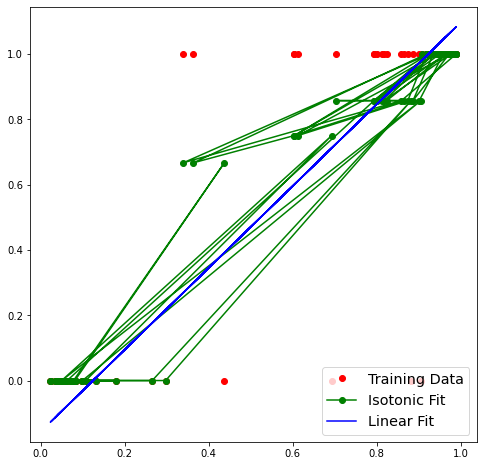

In [37]:
n = 89
segments = [[[i, y1[i]], [i, y1_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y1)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(a[:,1], y1, 'r.', markersize=12)
plt.plot(a[:,1], y1_, 'g.-', markersize=12)
plt.plot(a[:,1], lr.predict(a[:,1][:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Training Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right', fontsize = 'x-large')
#plt.title('Isotonic regression')
plt.savefig('LR1.jpg',dpi=1200)
plt.show()

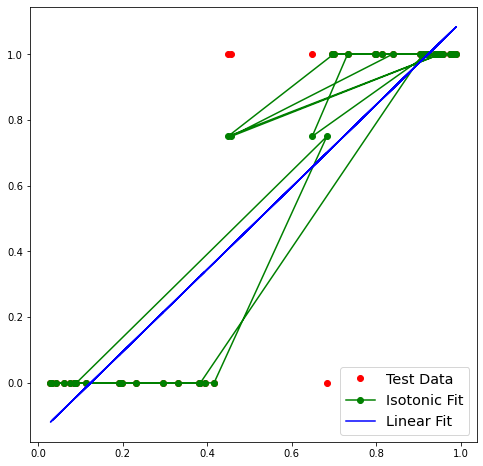

In [38]:
y11_ = ir.fit_transform(b[:,1], y11)
lr = LinearRegression()
lr.fit(b[:,1][:, np.newaxis], y11)

n = 50
segments = [[[i, y11[i]], [i, y11_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y11)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(b[:,1], y11, 'r.', markersize=12)
plt.plot(b[:,1], y11_, 'g.-', markersize=12)
plt.plot(b[:,1], lr.predict(b[:,1][:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Test Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right', fontsize = 'x-large')
#plt.title('Isotonic regression')
plt.savefig('LR2.jpg',dpi=1200)
plt.show()